In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
NYlistings = pd.read_csv('new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [3]:
{col:NYlistings[f'{col}'].isnull().any() for col in list(NYlistings.columns)}

{'id': False,
 'name': True,
 'host_id': False,
 'host_name': True,
 'neighbourhood_group': False,
 'neighbourhood': False,
 'latitude': False,
 'longitude': False,
 'room_type': False,
 'price': False,
 'minimum_nights': False,
 'number_of_reviews': False,
 'last_review': True,
 'reviews_per_month': True,
 'calculated_host_listings_count': False,
 'availability_365': False}

In [4]:
NYlistings['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

In [5]:
NYlistings['host_name'][NYlistings['host_id']==219517861].value_counts()

Sonder (NYC)    327
Name: host_name, dtype: int64

In [6]:
manhattan=NYlistings[NYlistings['neighbourhood_group']=='Manhattan']
display(manhattan['price'].min(),manhattan['price'].max())
manhattan=manhattan.drop(index=manhattan[manhattan['price']==0].index[0])

0

10000

<IPython.core.display.Javascript object>


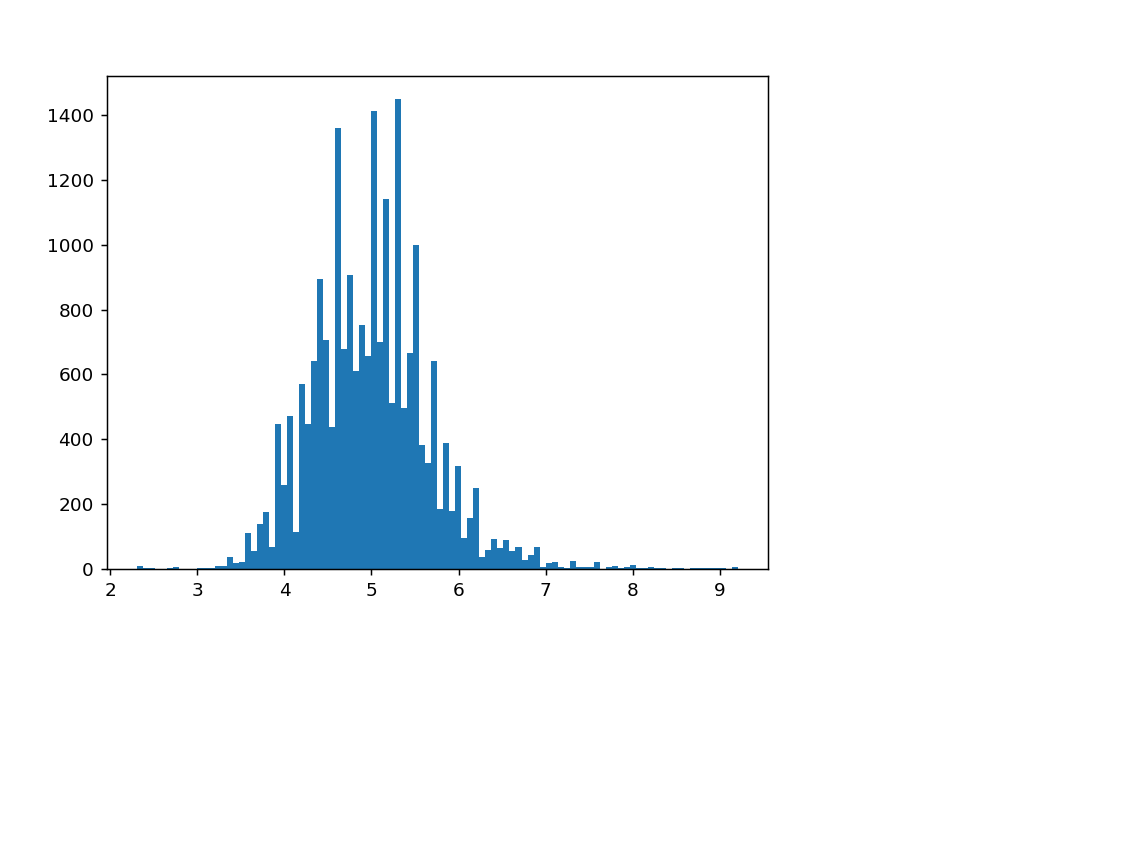

In [7]:
plt.hist(np.log(manhattan['price']),bins=100);

In [8]:
lat, long, price=list(np.array(manhattan['latitude'].values.tolist())), list(np.array(manhattan['longitude'].values.tolist())), list(np.array(manhattan['price'].values.tolist()))
type(lat)

list

<IPython.core.display.Javascript object>


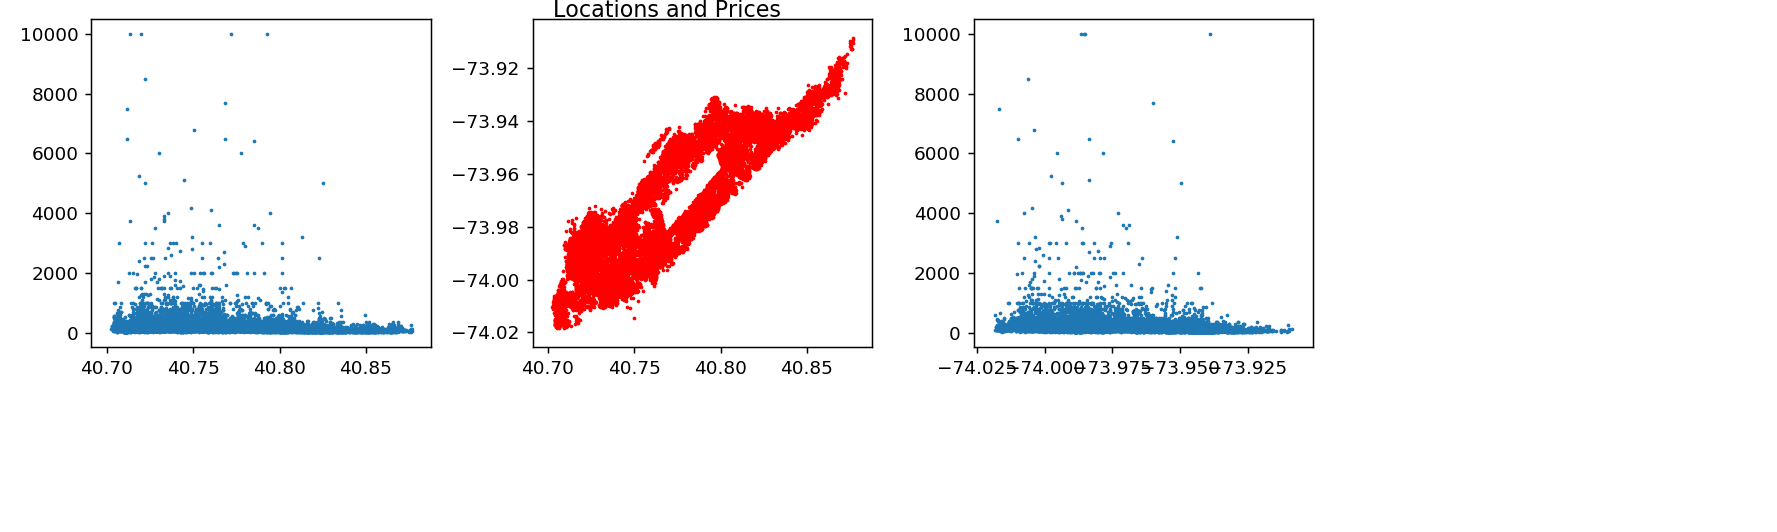

In [42]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
fig.suptitle('Locations and Prices',y=1)
fig.subplots_adjust(top=0.10,bottom=-1)
ax[0].scatter(lat,price,s=1)
ax[1].scatter(lat, long, c='r',s=1, marker='o')
ax[2].scatter(long,price,s=1)

fig.tight_layout()

<IPython.core.display.Javascript object>


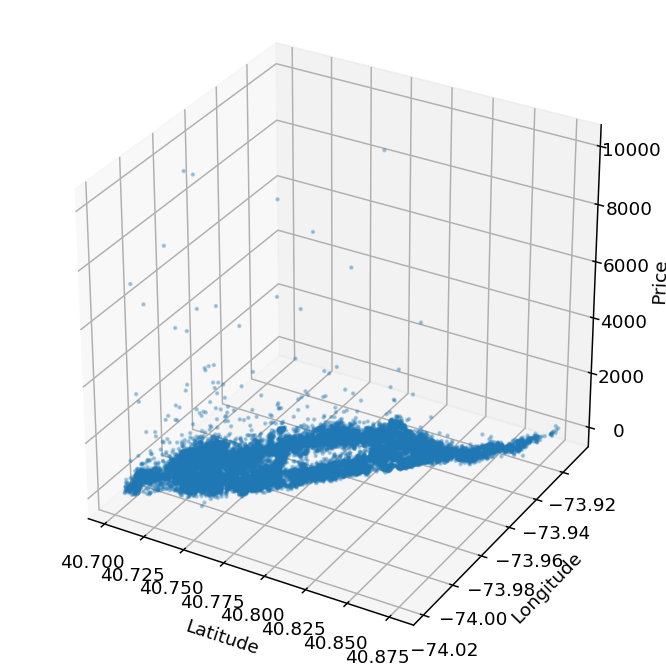

Text(0.5, 0, 'Price')

In [47]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(lat,long,price,s=2,alpha=.3)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Price')


In [61]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = NYlistings[['longitude','latitude']]
y = NYlistings['price']
trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2, random_state=1)

In [63]:
LR = LinearRegression()
model = LR.fit(trainX,trainY)
y_pred = model.predict(testX)

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 87.62888089839302
Mean Squared Error: 62887.70990947472
Root Mean Squared Error: 250.77422098268937
